## Max & min

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/2018-1-1-BTCUSDT-5m.csv').take(range(300,800))

In [3]:
n=8 # number of points to be checked before and after 

# Find local peaks
df['min'] = df.iloc[argrelextrema(df.Close.values, np.less_equal, order=n)[0]]['Close']
df['max'] = df.iloc[argrelextrema(df.Close.values, np.greater_equal, order=n)[0]]['Close']

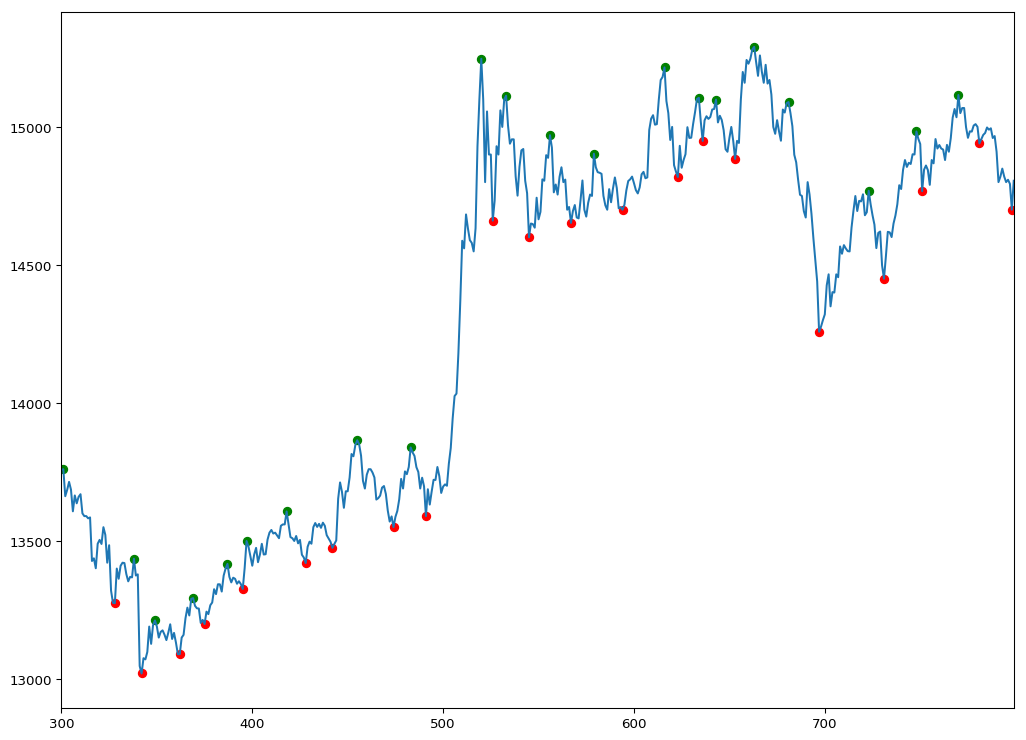

In [4]:
plt.figure(figsize=(12.8, 9.6), dpi=96);

df["Close"].plot()
plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')